In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style for better visualizations
sns.set_style("whitegrid")

In [2]:
#importing 2022 data form the excel file
df_monumnets = pd.read_excel("Tourism-Statistics-for-year-2022.xlsx", sheet_name = "Table 31")

In [35]:
#helping to remove the initial 2 rows that were random

df_clean =  pd.read_excel('Tourism-Statistics-for-year-2022.xlsx', 
                        sheet_name='Table 31', 
                        skiprows=2)

In [36]:
#cleaning the last 2 unwated column
df_clean = df_clean.drop(["% Growth 2022-\n23/2021-22","Unnamed: 7"], axis = 1)

In [39]:
#Restructuring the name of the files 
df_clean.columns = ['S.No', 'Monument_Name', 'Domestic_2021_22', 'Foreign_2021_22', 
                   'Domestic_2022_23', 'Foreign_2022_23']

In [44]:
#This will help in clearing the NaN monument entries for the dataframe
df_clean.dropna(subset=['Monument_Name'], inplace = True) #its given subset because we only want to remove the files in the Monument column

In [46]:
#removing S.No column as we have index as well
df_clean = df_clean.drop("S.No", axis = 1)

In [52]:
#Reset all the index normaly 

df_clean = df_clean.reset_index(drop = True)

In [60]:
#check for the files that are containing total and grand total as this will give error in in plotting 
df_clean = df_clean[~df_clean["Monument_Name"].str.strip().str.endswith('Total', na=False)]

In [62]:
#again reset the index

df_clean = df_clean.reset_index(drop = True)

In [98]:
#creating a new column named as total value of the year to clearly get top 20 per year 

#for 2021 and 2022
df_for_2021_22 = df_clean[['Monument_Name','Domestic_2021_22', 'Foreign_2021_22']].copy()
df_for_2021_22["Total_visit_2021_22"] = (df_for_2021_22["Domestic_2021_22"] + df_for_2021_22["Foreign_2021_22"])/1000000

df_for_2022_23 = df_clean[['Monument_Name','Domestic_2022_23', 'Foreign_2022_23']].copy()
df_for_2022_23["Total_visit_2022_23"] = (df_for_2022_23["Domestic_2022_23"] + df_for_2022_23["Foreign_2022_23"])/1000000

In [101]:
#This will help in sorting the values

df_for_2021_22["Total_visit_2021_22"]= df_for_2021_22["Total_visit_2021_22"].astype(float)
df_for_2021_22.sort_values("Total_visit_2021_22", ascending=False)
df_for_2021_22.reset_index(drop = True, inplace = True)

df_for_2022_23["Total_visit_2022_23"]= df_for_2022_23["Total_visit_2022_23"].astype(float)
df_for_2022_23.sort_values("Total_visit_2022_23", ascending=False)
df_for_2022_23.reset_index(drop = True, inplace = True)

In [102]:
#geting the top 15 out of all the places 

top_monuments_2021_22 = df_for_2021_22.nlargest(15, 'Total_visit_2021_22').copy()
top_monuments_2022_23 = df_for_2022_23.nlargest(15, 'Total_visit_2022_23').copy()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

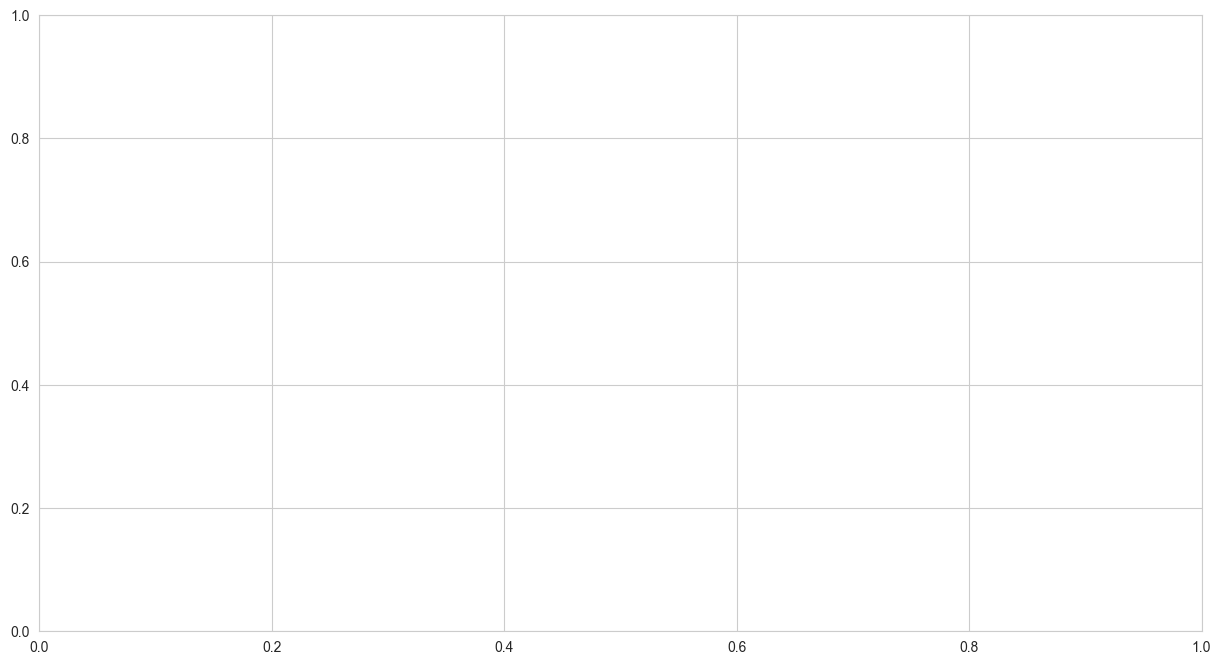

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
monuments = top_monuments_2021_22["Monument_Name"]
domestic = top_monuments_2021_22["Domestic_2021_22"] / 1000000
foreign = top_monuments_2021_22["Foreign_2021_22"] / 1000000

# Create x-axis
x = np.arange(len(monuments))

# Create stackplot
plt.figure(figsize=(15, 8))
plt.stackplot(x, domestic, foreign, 
             labels=['Domestic', 'Foreign'], 
             colors=['skyblue', 'lightcoral'], 
             alpha=0.8)

# Customize plot
plt.xlabel('Monuments', fontsize=12, fontweight='bold')
plt.ylabel('Visitors (in millions)', fontsize=12, fontweight='bold')
plt.title('Monument Visitors in 2021-22 (Cumulative Stack)', fontsize=14, fontweight='bold')
plt.xticks(x, monuments, rotation=45, ha='right', fontsize=10)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

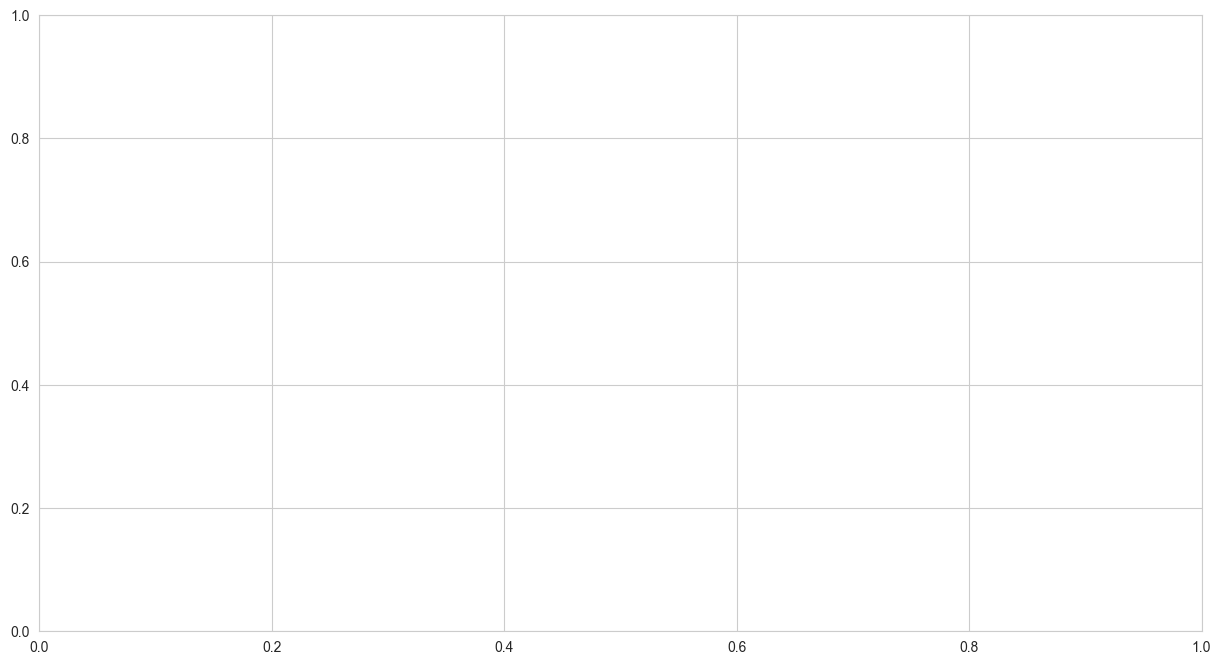

In [117]:
#For 2021-2022 ploting the graph

Monuments_name_2021_22 = top_monuments_2021_22["Monument_Name"]
Domestic_2021_22 = top_monuments_2021_22["Domestic_2021_22"]
Foreign_2021_22 = top_monuments_2021_22["Foreign_2021_22"]

x = np.arange(len(Monuments_name_2021_22))

plt.figure(figsize=(15, 8))
plt.stackplot(x, Domestic_2021_22, Foreign_2021_22, 
             labels=['Domestic', 'Foreign'], 
             colors=['skyblue', 'lightcoral'], 
             alpha=0.8) #stack plot always take x first and them y

plt.xlabel("Monuments", fontsize=12, fontweight='bold')
plt.ylabel("Visitors (in millions)", fontsize=12, fontweight='bold')
plt.title("Monument Visitors in 2021-22 (Stacked)", fontsize=14, fontweight='bold')

plt.xticks(x, Monuments_name_2021_22, rotation=45, ha='right', fontsize=10)  # Show actual year instead of 0,1,2,... 

plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [103]:
top_monuments_2021_22

,Monument_Name,Domestic_2021_22,Foreign_2021_22,Total_visit_2021_22
0,Taj Mahal,3294611,38922,3.333533
62,Cooch Bihar Palace,2287176,162,2.287338
105,Red Fort,1323501,5579,1.329080
107,Qutub Minar,1157664,8456,1.166120
26,Group of Monuments Mamallapuram,1142150,7532,1.149682
1,Agra Fort,1027462,13598,1.041060
120,Golconda,946972,1511,0.948483
73,"Sun Temple, Konark",672891,314,0.673205
125,Chittaurgarh Fort,590389,288,0.590677
86,Shaniwarwada,516448,478,0.516926
